In [ ]:
import time
import warnings
import matplotlib.pyplot as plt
import sklearn.datasets as ds
import sklearn.model_selection as cv
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    BaggingClassifier,
    ExtraTreesClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    VotingClassifier,
)
from google.colab import files
from google.colab import drive

%matplotlib inline

In [ ]:
def compute_executions_time(function):
    def wrapper():
        start_time = time.time()  # init measuring time
        function()  # execute function
        print(f"\n{time.time() - start_time} seconds")  # print execution time
    return wrapper

In [ ]:
uploaded = files.upload()

Saving cancer_preprocesado.csv to cancer_preprocesado.csv


In [ ]:
df = pd.read_csv('/content/cancer_preprocesado.csv')
df.head()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,33,1,2,4,5,4,3,2,2,4,...,3,4,2,2,3,1,2,3,4,Low
1,17,1,3,1,5,3,4,2,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,35,1,4,5,6,5,5,4,6,7,...,8,7,9,2,1,4,6,7,2,High
3,37,1,7,7,7,7,6,7,7,7,...,4,2,3,1,4,5,6,7,5,High
4,46,1,6,8,7,7,7,6,7,7,...,3,2,4,1,4,2,4,2,3,High


In [ ]:
X = df.values[:, :-1]
y = df.values[:,-1]
print(X.shape)
print(y.shape)

X_train, X_test,  y_train, y_test = cv.train_test_split(X, y, test_size = .2, random_state = 1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1000, 23)
(1000,)
(800, 23)
(200, 23)
(800,)
(200,)


Random forest

In [ ]:
lrf = []
for n_trees in [1, 2, 5, 10, 20, 50, 100, 200]:
        random_forest_classifier = RandomForestClassifier(
            n_estimators = n_trees,
            max_depth=3
        )
        scores = cross_val_score(
            estimator = random_forest_classifier,
            X = X,
            y = y,
            cv=10,
            scoring="accuracy"
        )
        print(f"Accuracy: {scores.mean():.3f} [nº estimators (trees): {n_trees}]")
        lrf.append(scores.mean())

Accuracy: 0.875 [nº estimators (trees): 1]
Accuracy: 0.924 [nº estimators (trees): 2]
Accuracy: 0.967 [nº estimators (trees): 5]
Accuracy: 0.982 [nº estimators (trees): 10]
Accuracy: 0.987 [nº estimators (trees): 20]
Accuracy: 0.988 [nº estimators (trees): 50]
Accuracy: 0.993 [nº estimators (trees): 100]
Accuracy: 0.993 [nº estimators (trees): 200]


In [ ]:
clf = RandomForestClassifier(n_estimators = 50, max_depth=3) #entre 3 y 4
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.3f}")

Accuracy: 0.990


Extra trees classifier

In [ ]:
lext = []
for n_trees in [1, 2, 5, 10, 20, 50, 100, 200]:
        extra_trees_classifier = ExtraTreesClassifier(
            n_estimators = n_trees
        )
        scores = cross_val_score(
            estimator = extra_trees_classifier,
            X = X,
            y = y,
            cv = 10,
            scoring = "accuracy"
        )
        print(f"Accuracy: {scores.mean():.3f} [nº estimators (trees): {n_trees}]")
        lext.append(scores.mean())

Accuracy: 1.000 [nº estimators (trees): 1]
Accuracy: 1.000 [nº estimators (trees): 2]
Accuracy: 1.000 [nº estimators (trees): 5]
Accuracy: 1.000 [nº estimators (trees): 10]
Accuracy: 1.000 [nº estimators (trees): 20]
Accuracy: 1.000 [nº estimators (trees): 50]
Accuracy: 1.000 [nº estimators (trees): 100]
Accuracy: 1.000 [nº estimators (trees): 200]


Bagging

In [ ]:
lb=[]
for nest in [1, 2, 5, 10, 20, 50, 100, 200]:
    scores = cross_val_score(
        BaggingClassifier(
            estimator = DecisionTreeClassifier(),
            n_estimators = nest
        ),
        X,
        y,
        cv = 10,
        scoring="accuracy"
    )
    print(f"Accuracy: {scores.mean():.3f} [nº estimators: {nest}]")
    lb.append(scores.mean())

lb2=[]
print()
for nest in [1, 2, 5, 10, 20, 50, 100, 200]:
    scores = cross_val_score(
        BaggingClassifier(
            estimator = DecisionTreeClassifier(max_depth = 3),
            n_estimators = nest,
            max_features = 0.2
        ),
        X,
        y,
        cv = 10,
        scoring="accuracy"
    )
    print(f"Accuracy: {scores.mean():.3f} [nº estimators: {nest}]")
    lb2.append(scores.mean())

Accuracy: 1.000 [nº estimators: 1]
Accuracy: 1.000 [nº estimators: 2]
Accuracy: 1.000 [nº estimators: 5]
Accuracy: 1.000 [nº estimators: 10]
Accuracy: 1.000 [nº estimators: 20]
Accuracy: 1.000 [nº estimators: 50]
Accuracy: 1.000 [nº estimators: 100]
Accuracy: 1.000 [nº estimators: 200]

Accuracy: 0.826 [nº estimators: 1]
Accuracy: 0.918 [nº estimators: 2]
Accuracy: 0.947 [nº estimators: 5]
Accuracy: 0.975 [nº estimators: 10]
Accuracy: 0.987 [nº estimators: 20]
Accuracy: 0.984 [nº estimators: 50]
Accuracy: 0.989 [nº estimators: 100]
Accuracy: 0.991 [nº estimators: 200]


In [1]:
clf = BaggingClassifier(
            estimator = DecisionTreeClassifier(max_depth = 3),
            n_estimators = 50,
            max_features = 0.2 #[0.2 , 0.3]
        )
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.3f}")

NameError: name 'BaggingClassifier' is not defined

Voting scheme

In [ ]:
@compute_executions_time
def execute_voting_scheme_different_estimators_grid_search_and_cv(cv = 10):
    naive_bayes = GaussianNB()
    k_neighbors = KNeighborsClassifier()
    params_space = {
        "n_neighbors": list(range(1, 30, 2)),
        "weights": ["distance", "uniform"]
    }

    clf = GridSearchCV(
        k_neighbors,
        param_grid = params_space,
        cv = cv,
        n_jobs = -1
    )
    clf.fit(X, y)
    best_parameters_for_knn = clf.best_params_
    print(f"Best Params fo Knn: {clf.best_params_} - Accuracy: {clf.best_score_}")

    clf2 = KNeighborsClassifier(
        n_neighbors = best_parameters_for_knn["n_neighbors"],
        weights = best_parameters_for_knn["weights"]
    )
    clf3 = DecisionTreeClassifier(criterion="entropy", max_depth=3)

    sc=[0, 0, 0]

    for clf, label, num in zip([naive_bayes, clf2, clf3], ["Naive Bayes","Knn (3)", "Dec. Tree", ], range(3)):
        scores = cross_val_score(
            clf,
            X,
            y,
            cv = cv,
            scoring = "accuracy"
        )
        print(f"Accuracy: {scores.mean():.3f} [{label}]")
        sc[num] = scores.mean()

    totalsc = np.sum(sc)

    warnings.filterwarnings("ignore", category=DeprecationWarning)  # Just to avoid warnings

    voting_classifier = VotingClassifier(
        estimators=[
            ("nb", naive_bayes),
            ("knn3", clf2),
            ("dt", clf3)
        ],
        voting = "hard"
    )
    scores = cross_val_score(
        voting_classifier,
        X,
        y,
        cv = cv,
        scoring = "accuracy")
    print("Accuracy: %0.3f [%s]" % (scores.mean() , "Majority Voting"))

    weights = [sc[0]/totalsc, sc[1]/totalsc, sc[2]/totalsc]

    eclf = VotingClassifier(
        estimators=[('nb', naive_bayes), ('knn3', clf2), ('dt', clf3)],
        voting='soft',
        weights=weights
    )
    scores = cross_val_score(eclf, X, y, cv=cv, scoring='accuracy')
    print("Accuracy: %0.3f [%s]" % (scores.mean(), "Weighted Voting"))

    #TEST

    clf = voting_classifier.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.3f}")

    clf = eclf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.3f}")

execute_voting_scheme_different_estimators_grid_search_and_cv()

Best Params fo Knn: {'n_neighbors': 1, 'weights': 'distance'} - Accuracy: 0.999
Accuracy: 0.890 [Naive Bayes]
Accuracy: 0.999 [Knn (3)]
Accuracy: 0.943 [Dec. Tree]
Accuracy: 0.975 [Majority Voting]
Accuracy: 0.999 [Weighted Voting]
Accuracy: 0.970
Accuracy: 0.995

6.612058162689209 seconds


Boosting

In [ ]:
for nest in [1,2,5,10,20,50,100,200]:
    scores = cross_val_score(
        AdaBoostClassifier(
            DecisionTreeClassifier(),
            n_estimators = nest,
            algorithm='SAMME'
        ),
        X,
        y,
        cv = 10,
        scoring = "accuracy"
    )
    print("Accuracy: %0.3f [%s]" % (scores.mean(), nest))

lboodt = []
for nest in [1,2,5,10,20,50,100,200]:
    scores = cross_val_score(
        AdaBoostClassifier(
            DecisionTreeClassifier(max_depth = 3),  #1-5 está bien
            n_estimators = nest,
            algorithm='SAMME'
        ),
        X,
        y,
        cv = 10,
        scoring = "accuracy"
    )
    print("Accuracy: %0.3f [%s]" % (scores.mean(), nest))
    lboodt.append(scores.mean())

Accuracy: 1.000 [1]
Accuracy: 1.000 [2]
Accuracy: 1.000 [5]
Accuracy: 1.000 [10]
Accuracy: 1.000 [20]
Accuracy: 1.000 [50]
Accuracy: 1.000 [100]
Accuracy: 1.000 [200]
Accuracy: 0.949 [1]
Accuracy: 0.948 [2]
Accuracy: 1.000 [5]
Accuracy: 1.000 [10]
Accuracy: 1.000 [20]
Accuracy: 1.000 [50]
Accuracy: 1.000 [100]
Accuracy: 1.000 [200]


In [ ]:
clf = AdaBoostClassifier(
            DecisionTreeClassifier(max_depth = 1), # [1,2]
            n_estimators = 50,
            algorithm='SAMME'
        )
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.3f}")

Accuracy: 0.930


In [ ]:
lgbboo = []
for nest in [1,2,5,10,20,50,100,200]:
    scores = cross_val_score(
        GradientBoostingClassifier(n_estimators = nest),
        X,
        y,
        cv = 10,
        scoring = "accuracy"
    )
    print("Accuracy: %0.3f [%s]" % (scores.mean(), nest))
    lgbboo.append(scores.mean())

Accuracy: 0.971 [1]
Accuracy: 0.990 [2]
Accuracy: 1.000 [5]
Accuracy: 1.000 [10]
Accuracy: 1.000 [20]
Accuracy: 1.000 [50]
Accuracy: 1.000 [100]
Accuracy: 1.000 [200]


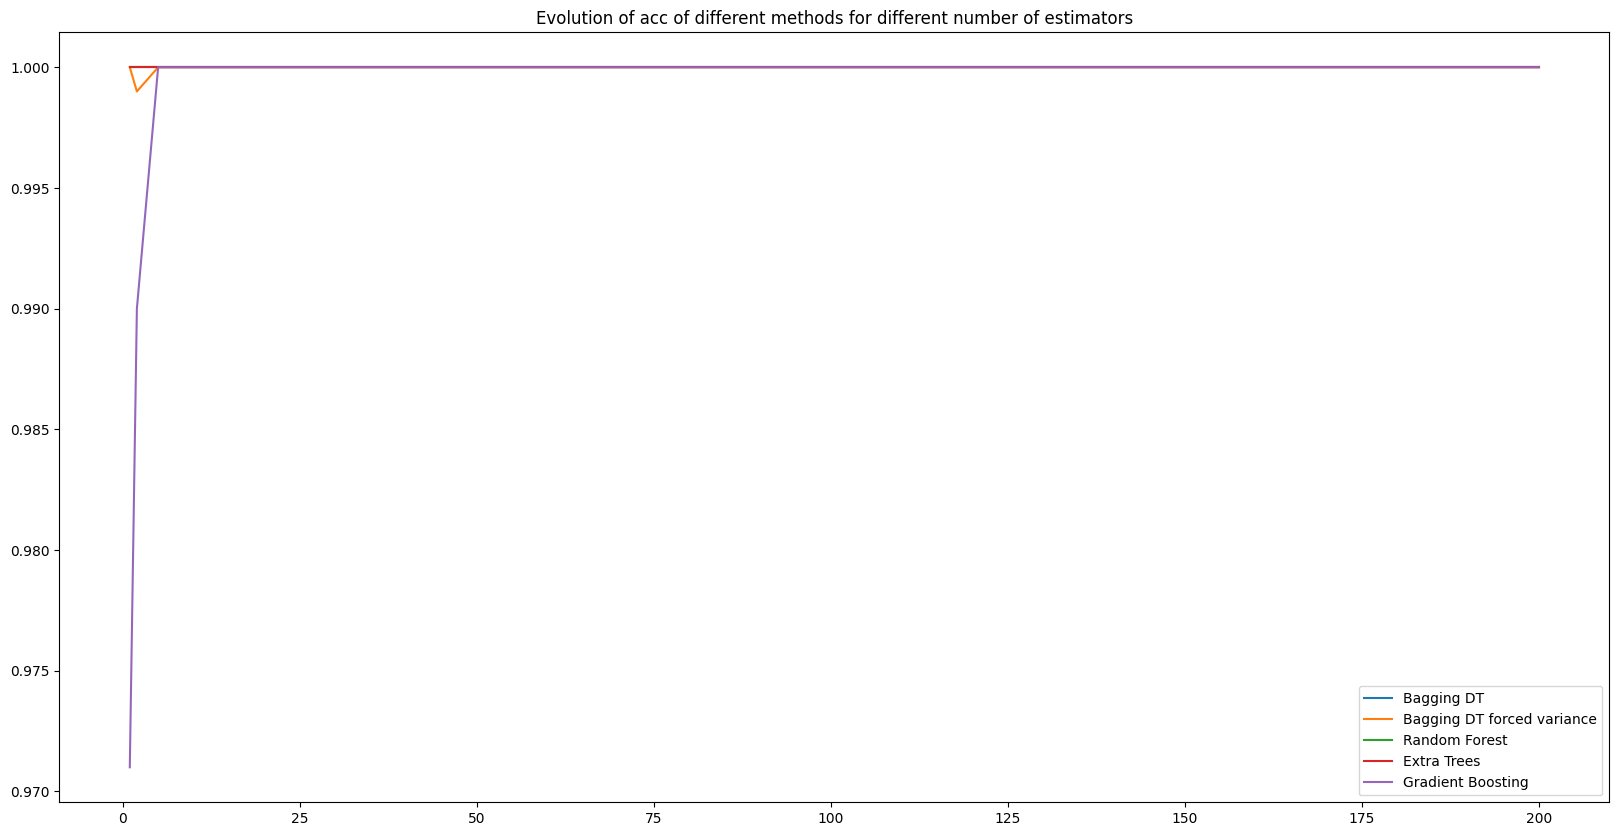

In [ ]:
plt.figure(figsize = (20, 10))
plt.title("Evolution of acc of different methods for different number of estimators")
plt.plot([1,2,5,10,20,50,100,200],lb,label = "Bagging DT")
plt.plot([1,2,5,10,20,50,100,200],lb2,label = "Bagging DT forced variance")
plt.plot([1,2,5,10,20,50,100,200],lrf,label = "Random Forest")
plt.plot([1,2,5,10,20,50,100,200],lext,label = "Extra Trees")
plt.plot([1,2,5,10,20,50,100,200],lgbboo,label = "Gradient Boosting")
plt.legend(loc = "lower right")
plt.show()

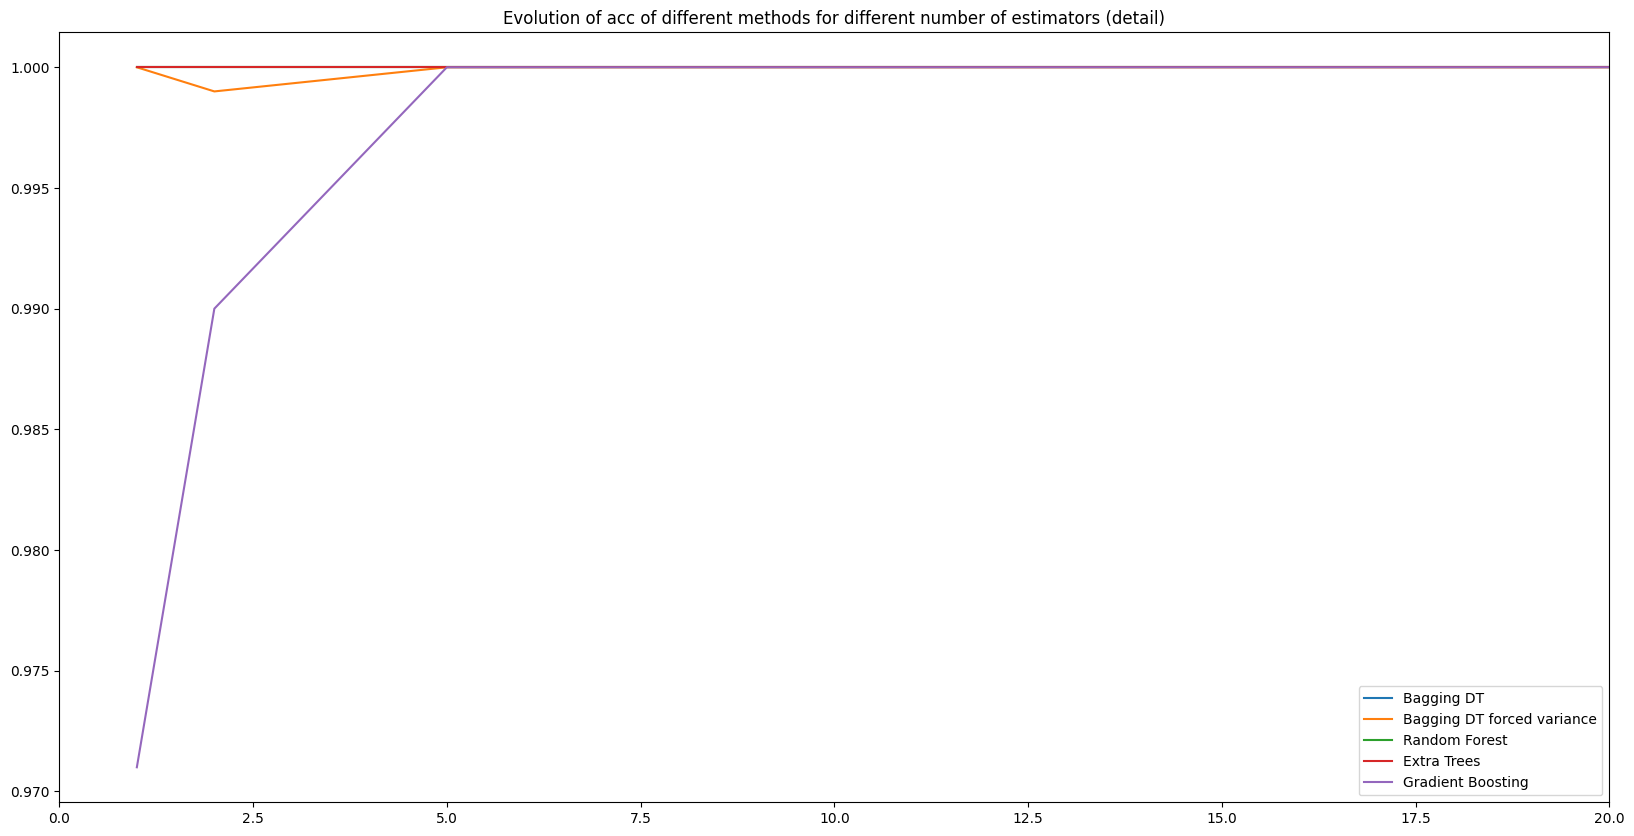

In [ ]:
plt.figure(figsize = (20, 10))
plt.title("Evolution of acc of different methods for different number of estimators (detail)")
plt.plot([1,2,5,10,20,50,100,200],lb,label = "Bagging DT")
plt.plot([1,2,5,10,20,50,100,200],lb2,label = "Bagging DT forced variance")
plt.plot([1,2,5,10,20,50,100,200],lrf,label = "Random Forest")
plt.plot([1,2,5,10,20,50,100,200],lext,label = "Extra Trees")
plt.plot([1,2,5,10,20,50,100,200],lgbboo,label = "Gradient Boosting")
plt.legend(loc = "lower right")
plt.xlim(0,20)
plt.show()

Feature selection with Forests of trees

In [ ]:
clf = RandomForestClassifier(n_estimators = 100)
clf = clf.fit(X, y)
print(clf.feature_importances_)

[0.00761802 0.00045646 0.02093649 0.0388619  0.04650381 0.03577309
 0.04666524 0.01771555 0.04740427 0.11707457 0.04709594 0.09667874
 0.02883172 0.08321574 0.06753225 0.02367609 0.03503198 0.07936781
 0.04931229 0.04347145 0.01965787 0.01343359 0.03368514]


In [ ]:
from sklearn.feature_selection import SelectFromModel

model = SelectFromModel(clf, prefit = True, threshold = 0.1)
X_new = model.transform(X)
print(X_new.shape)

print(np.mean(cross_val_score(KNeighborsClassifier(), X = X, y = y, cv = 10, scoring = "accuracy")))
print(np.mean(cross_val_score(KNeighborsClassifier(), X = X_new, y = y, cv = 10, scoring = "accuracy")))

(1000, 1)
0.998
0.669


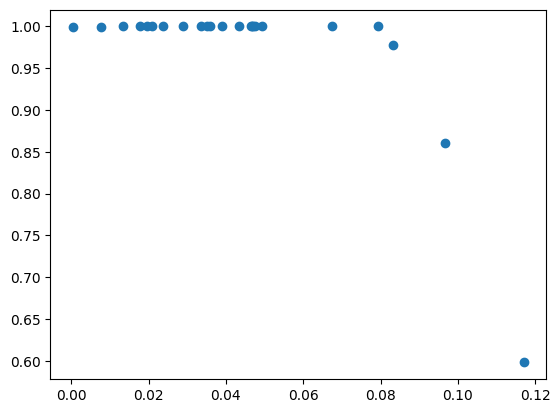

Best threshold: 0.02093648606877496


In [ ]:
thresholds = clf.feature_importances_

l=[]
lparval=[]
for threshold in thresholds:
    model = SelectFromModel(
        clf,
        prefit = True,
        threshold = threshold
    )
    X_new = model.transform(X)
    params = {
        "n_neighbors": list(range(1,30,2)),
        "weights": ("distance", "uniform")
    }

    knc = KNeighborsClassifier()
    clf2 = GridSearchCV(
        knc,
        param_grid = params,
        cv = 10,
        n_jobs = -1
    )
    clf2.fit(X, y)
    parval = clf2.best_params_
    clf3 = KNeighborsClassifier(
        n_neighbors = parval["n_neighbors"],
        weights = parval["weights"]
    )
    acc = np.mean(cross_val_score(clf3, X = X_new, y = y, cv = 10, scoring = "accuracy"))
    l.append(acc)
    lparval.append(parval)

plt.scatter(thresholds,l)
plt.show()

print(f"Best threshold: {thresholds[np.argmax(l)]}")

In [ ]:
parval = lparval[np.argmax(l)]
model = SelectFromModel(
    clf,
    prefit = True,
    threshold = thresholds[np.argmax(l)]
)
X_new = model.transform(X)
print(X_new.shape)


print("With FS: ", np.mean(cross_val_score(KNeighborsClassifier(n_neighbors=parval['n_neighbors'],weights=parval['weights']), X=X_new, y=y, cv=10, scoring='accuracy')))

(1000, 8)
With FS:  1.0
